# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [58]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [59]:
train, test = keras.datasets.cifar10.load_data()

In [60]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [61]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [62]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [63]:
## 超參數設定
"""
Set your required experiment parameters
"""
from keras import optimizers
LEARNING_RATE = [1e-2,1e-3]
print (LEARNING_RATE)
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95]
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
sgd = optimizers.SGD(lr=0.01, clipnorm=1)
adam =  optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
Optimizers = [optimizers.Adagrad, optimizers.SGD, optimizers.Adam, optimizers.RMSprop ]
#Optimizers.append(sgd)
#Optimizers.append(rmsprop)
#Optimizers.append(adam)
#Optimizers.append(adagrad)

[0.01, 0.001]


In [73]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr, opti in itertools.product(LEARNING_RATE, Optimizers):
    #for optimizer in Optimizers:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with %s = %6f" % (str(opti),lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        
        optimizer = opti(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-lr-%s" % (str(lr), str(opti))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
        


Experiment with <class 'keras.optimizers.Adagrad'> = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.0738 - acc: 0.2541 - val_loss: 2.0190 - val_acc: 0.2467
Epoch 2/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8896 - acc: 0.3339 - val_loss: 1.8742 - val_acc: 0.3266
Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8190 - acc: 0.3616 - val_loss: 1.8254 - val_acc: 0.3379
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7762 - acc: 0.3755 - val_loss: 1.7893 - val_acc: 0.3768
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.7367 - acc: 0.3920 - val_loss: 1.7992 - val_acc: 0.3470
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7038 - acc: 0.4029 - val_loss: 1.7100 - val_acc: 0.4019
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.6839 - acc: 0.4070 - val_loss: 1.8464 - val_a

Epoch 2/50
50000/50000 [==============================] - 7s 145us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/500

50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=======

50000/50000 [==============================] - 5s 106us/step - loss: 1.8095 - acc: 0.3605 - val_loss: 1.7603 - val_acc: 0.3797
Epoch 3/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7372 - acc: 0.3863 - val_loss: 1.7935 - val_acc: 0.3617
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6915 - acc: 0.4051 - val_loss: 1.6943 - val_acc: 0.4044
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6540 - acc: 0.4187 - val_loss: 1.6724 - val_acc: 0.4115
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6252 - acc: 0.4291 - val_loss: 1.6505 - val_acc: 0.4087
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6029 - acc: 0.4384 - val_loss: 1.6167 - val_acc: 0.4323
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5807 - acc: 0.4449 - val_loss: 1.5999 - val_acc: 0.4356
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 94us/step - loss: 2.1317 - acc: 0.2342 - val_loss: 2.1069 - val_acc: 0.2483
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.0904 - acc: 0.2505 - val_loss: 2.0703 - val_acc: 0.2637
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.0569 - acc: 0.2678 - val_loss: 2.0408 - val_acc: 0.2747
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.0287 - acc: 0.2812 - val_loss: 2.0144 - val_acc: 0.2950
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.0040 - acc: 0.2941 - val_loss: 1.9912 - val_acc: 0.3018
Epoch 8/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9821 - acc: 0.3020 - val_loss: 1.9709 - val_acc: 0.3081
Epoch 9/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9625 - acc: 0.3094 - val_loss: 1.9526 - val_acc: 0.3176
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 7s 131us/step - loss: 1.5662 - acc: 0.4437 - val_loss: 1.5652 - val_acc: 0.4378
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5158 - acc: 0.4607 - val_loss: 1.5616 - val_acc: 0.4396
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4814 - acc: 0.4730 - val_loss: 1.5217 - val_acc: 0.4554
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4423 - acc: 0.4836 - val_loss: 1.4600 - val_acc: 0.4787
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4139 - acc: 0.4960 - val_loss: 1.4529 - val_acc: 0.4831
Epoch 9/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3824 - acc: 0.5073 - val_loss: 1.4582 - val_acc: 0.4799
Epoch 10/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.3668 - acc: 0.5118 - val_loss: 1.4480 - val_acc: 0.4878
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 7s 149us/step - loss: 1.6573 - acc: 0.4104 - val_loss: 1.7862 - val_acc: 0.3631
Epoch 6/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6164 - acc: 0.4213 - val_loss: 1.6334 - val_acc: 0.4129
Epoch 7/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.5680 - acc: 0.4400 - val_loss: 1.9795 - val_acc: 0.3435
Epoch 8/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.5387 - acc: 0.4531 - val_loss: 1.4967 - val_acc: 0.4731
Epoch 9/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5020 - acc: 0.4633 - val_loss: 1.6076 - val_acc: 0.4272
Epoch 10/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.4715 - acc: 0.4755 - val_loss: 1.5859 - val_acc: 0.4318
Epoch 11/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4479 - acc: 0.4794 - val_loss: 1.6316 - val_acc: 0.4279
Epoch 12/50
50000/50000 [==================

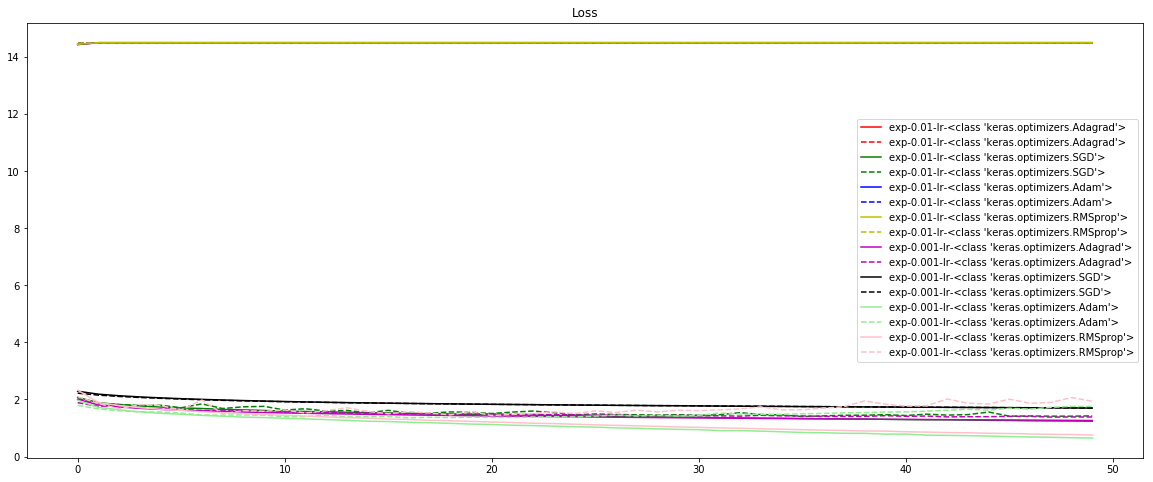

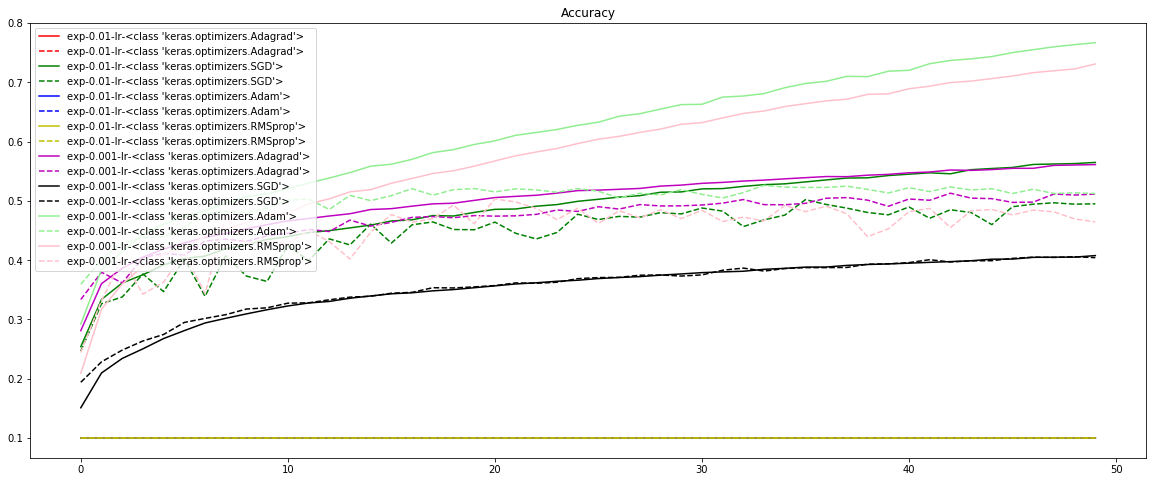

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "lightgreen", "pink"]

plt.figure(figsize=(20,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()